# Homework-2

### Part 3. Wine-Tasting Machine: Python Tasks

### Task1: Read  red-wine.csv into Python as a data frame, use a pandas profiling tool (https://github.com/pandas-profiling/pandas-profiling) to create an HTML file, and paste a screenshot of the HTML file here (10 points)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from ydata_profiling import ProfileReport

red_df = pd.read_csv('red_wine.csv')
red_df

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low
...,...,...,...,...
566,0.40,0.70,12.7,low
567,0.28,0.60,12.8,high
568,0.31,0.60,12.8,high
569,0.34,0.72,12.8,low


In [6]:
profile = ProfileReport(red_df, title="Profiling Report")

In [7]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

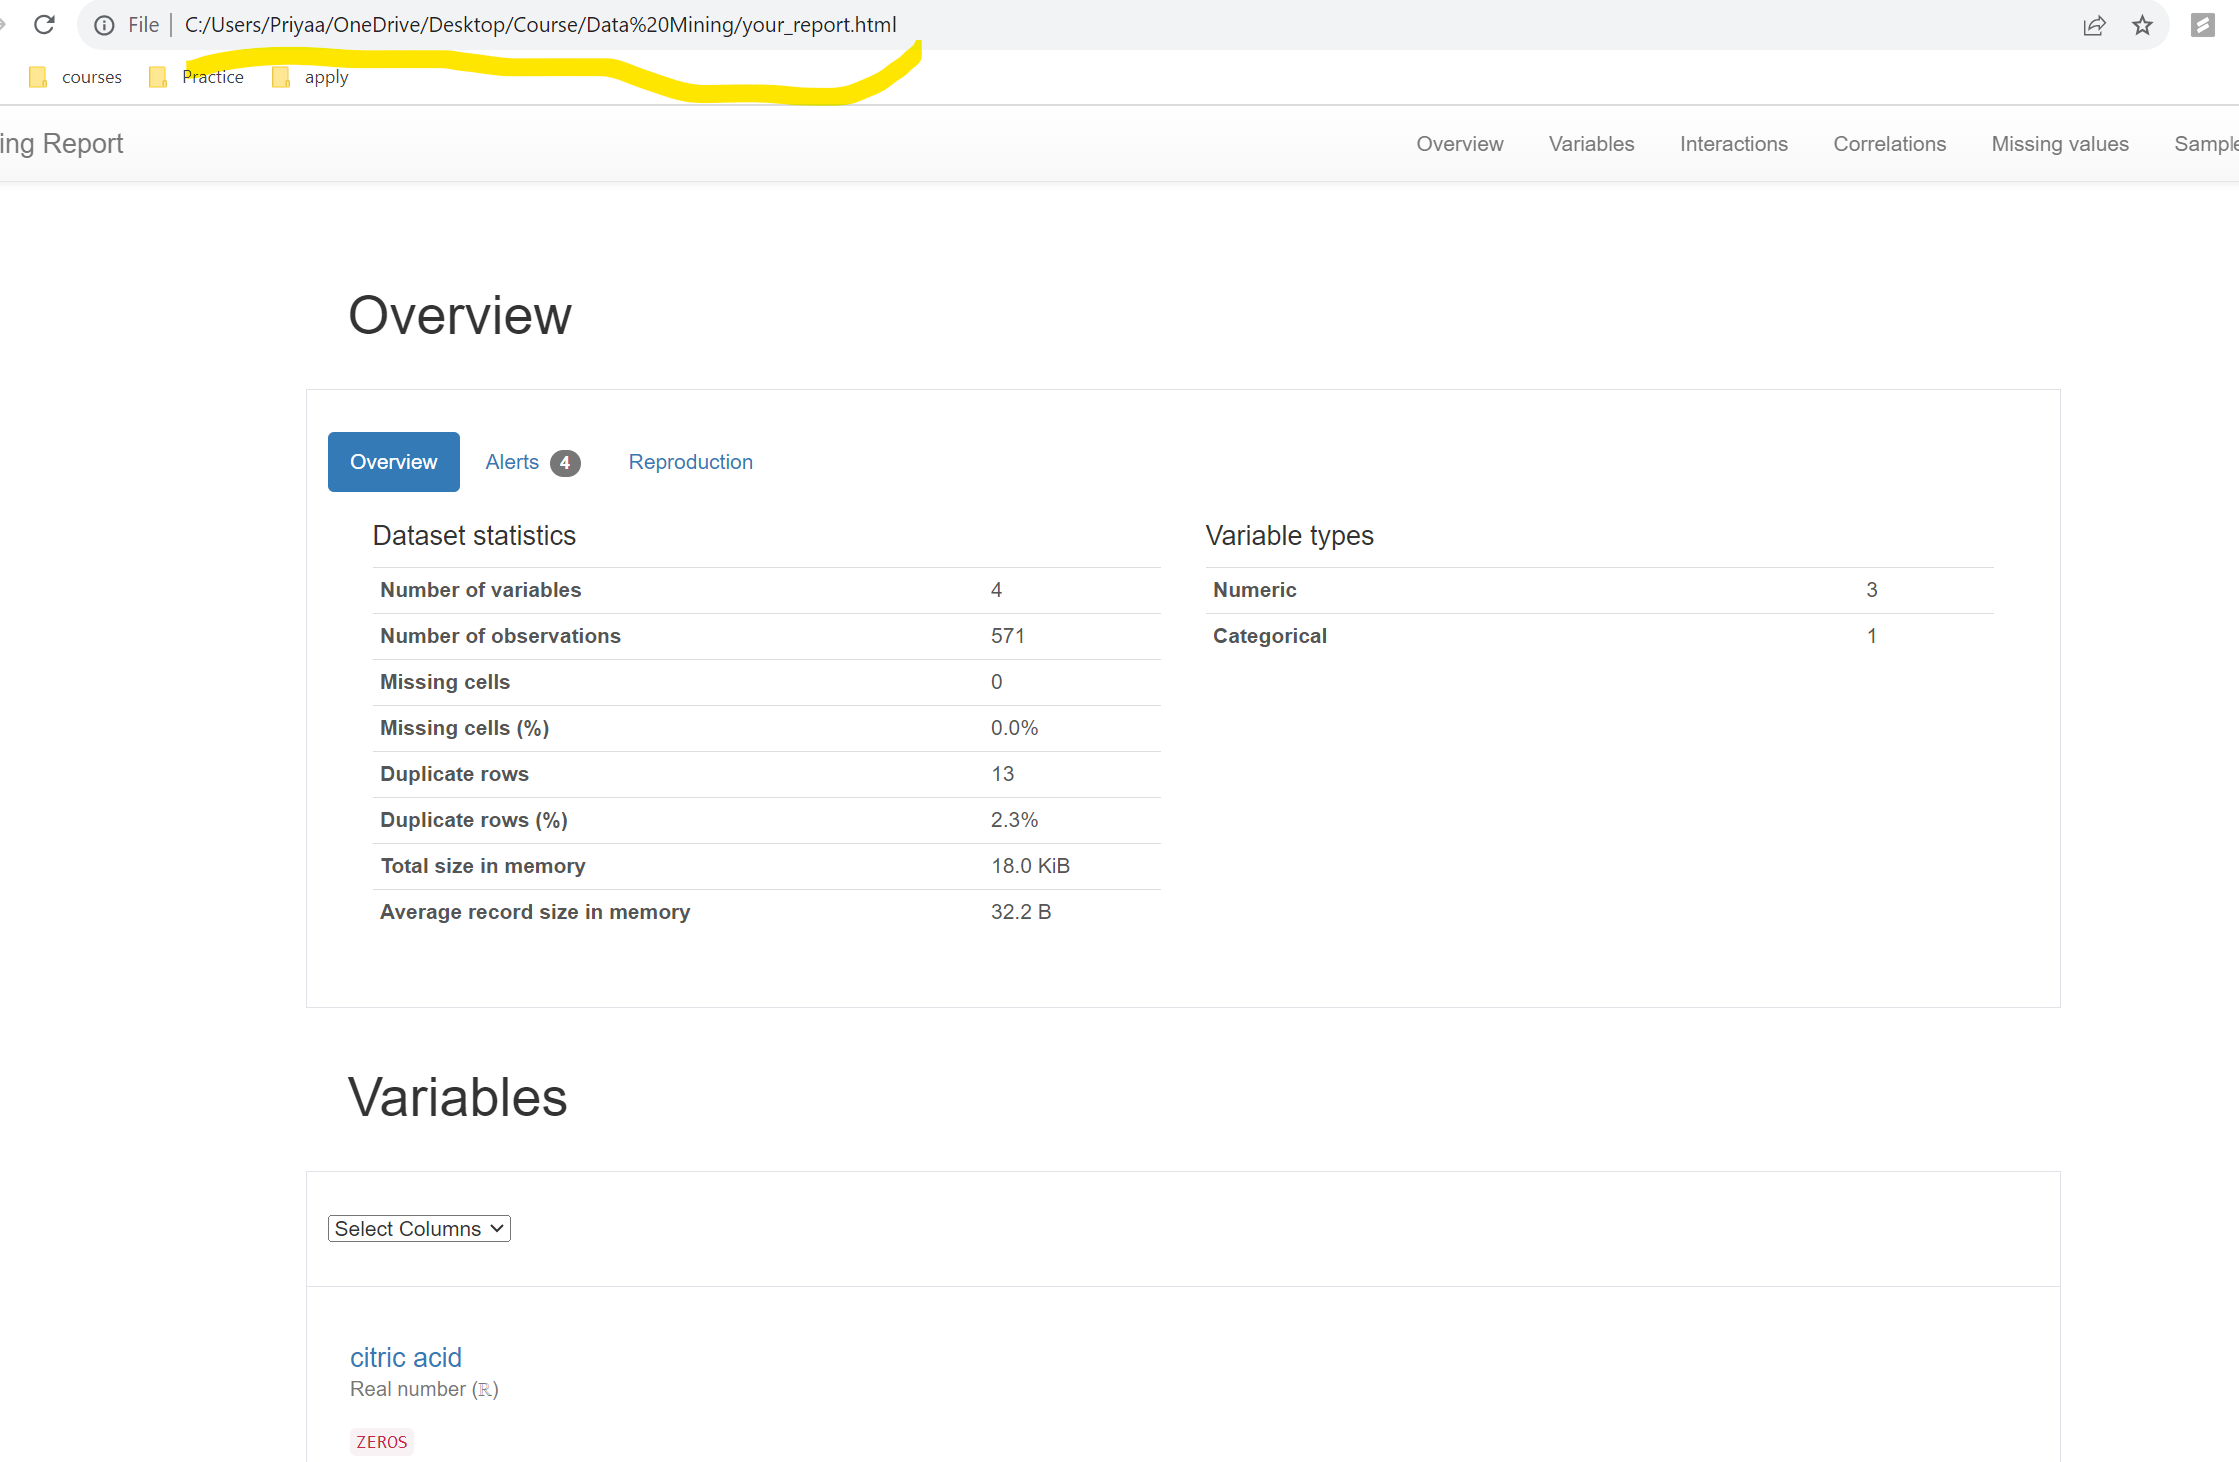

In [10]:
from IPython.display import Image

Image(filename='homework2.png')


### Task2: Fit a model using each of the following methods and report the performance metrics of 10-fold cross-validation using red-wine.csv as the training set (25 points). 

In [23]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Separate features (X) and target (y)
X = data.drop('type', axis=1)
y = data['type']

# Create a list of models to evaluate
models = [
    ('Baseline', None),  # Placeholder for baseline model
    ('Logistic Regression', LogisticRegression(max_iter=10000)),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM-Linear', SVC(kernel='linear')),
    ('SVM-RBF', SVC(kernel='rbf')),
    ('Random Forest', RandomForestClassifier())
]

# Initialize a K-Fold cross-validation object with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize dictionaries to store accuracy and AUC results
accuracy_results = {}
auc_results = {}

# Calculate Baseline Accuracy and AUC
baseline_accuracy = max(y.value_counts()) / len(y)
baseline_auc = 0.5  # A random classifier's AUC

# Iterate through models and perform cross-validation
for name, model in models:
    if model is None:  # Baseline model
        accuracy_results[name] = baseline_accuracy
        auc_results[name] = baseline_auc
    else:
        # Accuracy
        accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
        accuracy_results[name] = accuracy_scores.mean()
        
        # AUC
        auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
        auc_results[name] = auc_scores.mean()

# Create a DataFrame
result_df = pd.DataFrame({'Model': [name for name, _ in models],
                           'Accuracy': [accuracy_results[name] for name, _ in models],
                           'AUC': [auc_results[name] for name, _ in models]})

# Set "Model" as the index
result_df = result_df.set_index('Model')

# Print the DataFrame
# Transpose the DataFrame
result_df = result_df.T

# Print the DataFrame
result_df


Model,Baseline,Logistic Regression,Naive Bayes,Decision Tree,SVM-Linear,SVM-RBF,Random Forest
Accuracy,0.528897,0.788113,0.819661,0.812553,0.793376,0.541349,0.838869
AUC,0.500000,0.883773,0.898355,0.814446,0.882741,0.861241,0.930112


### Task3: Plot the ROC curve of the Random Forest classifier from the Python package, and paste a screenshot of your ROC curve here (10 points)

0.9116884888161484


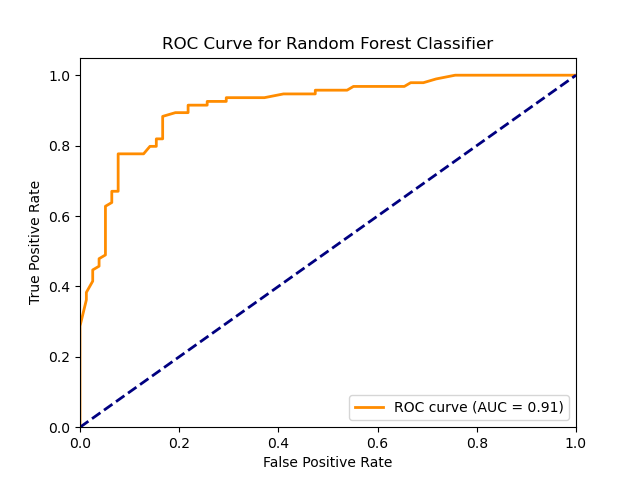

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Map 'high' to 1 and 'low' to 0 in the target variable
data['type'] = data['type'].map({'high': 1, 'low': 0})

# Separate features (X) and the mapped target (y)
X = data.drop('type', axis=1)
y = data['type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')

# Save the ROC curve as an image
plt.savefig('roc_curve.png')
# Show the plot (optional)
plt.show()
Image(filename='roc_curve.png')



### Task4: Using the best model obtained above in Q2 (according to AUC), running the model on white-wine.csv, and reporting the AUC score, comment on the performance. (5 points)


In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load the white-wine dataset
white_wine_data = pd.read_csv('white_wine.csv')

# Map 'high' to 1 and 'low' to 0 in the target variable if needed
# white_wine_data['type'] = white_wine_data['type'].map({'high': 1, 'low': 0})

# Separate features (X) and the mapped target (y)
X_white = white_wine_data.drop('type', axis=1)
y_white = white_wine_data['type']

# Assuming you have the best Random Forest model from Question 2 stored in 'best_rf_model'
best_rf_model = RandomForestClassifier()

# Train the best Random Forest model on the red-wine dataset
best_rf_model.fit(X, y)

# Predict probabilities for the positive class (type 'high' or class 1)
y_scores_white = best_rf_model.predict_proba(X_white)[:, 1]

# Calculate the AUC score for the white-wine dataset
auc_score_white = roc_auc_score(y_white, y_scores_white)

# Report the AUC score
print("AUC Score for White Wine Dataset:", auc_score_white)


AUC Score for White Wine Dataset: 0.027965284474445518


>  High AUC indicates good model performance, while a lower AUC may suggest a need for further model tuning or different modeling techniques to better suit the white wine data.

### Task5: Suppose all the models have comparable performance. Which model would you prefer if the wine-tasting experts would like to gain some insights into the model? Note: there could be multiple model types fitting this criterion. (5 points)


Decision Trees: Decision trees are highly interpretable models that can be easily visualized. You can analyze the tree structure to understand which features are the most important for making predictions. Decision trees split the data based on the most informative features at each node, making it clear which factors are influential in predicting wine quality.

Random Forest: Although Random Forest is an ensemble model, it is based on decision trees. It can provide feature importance scores for each feature, which can be used to understand which factors have the most impact on the model's predictions. Random Forest can also be a good choice for providing insights into the data.